In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [116]:
iris=pd.read_csv("Iris.csv")

In [117]:
iris.shape

(150, 6)

In [118]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [120]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [121]:
#Missing Value finding
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [122]:
#This step is completed as we do not have any missing values to be treated

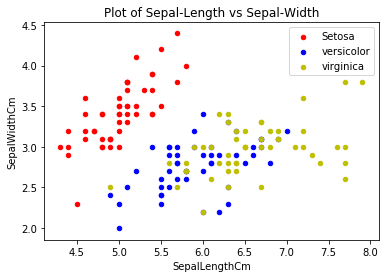

In [123]:
#Relationship
#Sepal Length and Width Relation
fig=iris[iris.Species=="Iris-setosa"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color="r",label="Setosa")
iris[iris.Species=="Iris-versicolor"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color="b",label="versicolor",ax=fig)
iris[iris.Species=="Iris-virginica"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color="y",label="virginica",ax=fig)
fig.set_xlabel("SepalLengthCm")
fig.set_ylabel("SepalWidthCm")
fig.set_title("Plot of Sepal-Length vs Sepal-Width")
fig=plt.gcf()
plt.show()

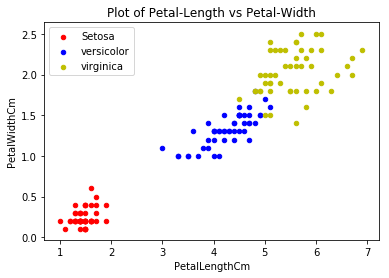

In [124]:
#Petal Length and Width Relation
fig=iris[iris.Species=="Iris-setosa"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",color="r",label="Setosa")
iris[iris.Species=="Iris-versicolor"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",color="b",label="versicolor",ax=fig)
iris[iris.Species=="Iris-virginica"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",color="y",label="virginica",ax=fig)
fig.set_xlabel("PetalLengthCm")
fig.set_ylabel("PetalWidthCm")
fig.set_title("Plot of Petal-Length vs Petal-Width")
fig=plt.gcf()
plt.show()

In [125]:
#Conclusion1
#Petal features are better estimate of results compared to sepal

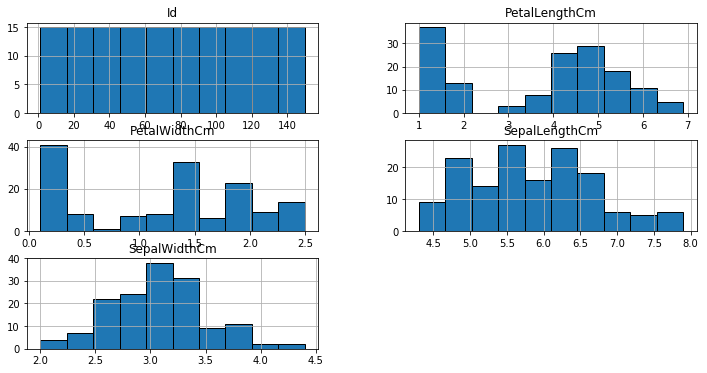

In [126]:
#Plotting histogram to see the distribution of all the features
iris.hist(edgeColor="black")
fig=plt.gcf() # getCurrentFigure
fig.set_size_inches(12,6)
plt.show()

In [127]:
#Correlation
iris.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [128]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [129]:
#PetalLength and PetalWidth are highly correlated.Hence once we would use all the features and once reduced 
#features(SepalL,SepalW,PetalW)

In [130]:
#Developing KNN from scratch as it would prove to be a useful algorithm as there are only 4 features in this model.
#Also as we have less examples we would use kFold developed from scratch
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [131]:
def k_nearest_neighbors(train,test,n_neighbors):
    predictions=list()
    for i in range(test.shape[0]):
        tmp=predict(test.iloc[i],train,n_neighbors)
        predictions.append(tmp)
    return predictions

In [132]:
def predict(testRow,train,n_neighbors):
    prList=list()
    for i in range(train.shape[0]):
        ans=euclidean_distance(testRow,train.iloc[i])
        prList.append((train.iloc[i].Species,ans))
    prList.sort(key=lambda tup:tup[1])
    ans=ansPrediction(prList,n_neighbors)
    return ans

In [133]:
def euclidean_distance(row1,row2):
    ans=0
    for i in range(1,len(row1)-1):
        ans=ans+(row1.iloc[i]-row2.iloc[i])**2
    return sqrt(ans)


In [134]:
def ansPrediction(List,n_neighbors):
    List=List[0:n_neighbors]
    L=[row[0] for row in List]
    return max(set(L), key=L.count)

In [135]:
def mostFrequent(Dict):
    tmp=0
    for i in Dict:
        if(Dict[i]>tmp):
            tmp=Dict[i]
            ans=i
    return ans
    

In [136]:
def evaluate(iris,k_nearest_neighbors,n_folds,n_neighbors):
    AccuracyList=list()
    nSets=iris.shape[0]/n_folds
    start=0
    for fold in range(n_folds):
        train=iris.iloc[:]
        test=iris.iloc[start:start+nSets,:]
        cond=train.index.isin(test.index)
        train.drop(train[cond].index,inplace=True)
        start=start+nSets
        predictions=k_nearest_neighbors(train,test,n_neighbors)
        accuracy=accuracy_score(test.Species,predictions)
        AccuracyList.append(accuracy)
    return sum(AccuracyList)/len(AccuracyList)

        
        

In [137]:
#finding the best k
k=[2,3,5,7,9,11,13,15]
for i in k:
    score=evaluate(iris,k_nearest_neighbors,n_folds,i)
    print("Score:{s} kvalue:{kval}".format(s=score,kval=i))

Score:0.92 kvalue:2
Score:0.906666666667 kvalue:3
Score:0.913333333333 kvalue:5
Score:0.92 kvalue:7
Score:0.92 kvalue:9
Score:0.913333333333 kvalue:11
Score:0.906666666667 kvalue:13
Score:0.9 kvalue:15


In [138]:
#finding out the best k for k-FoldCrossValidation and finding out the best distance 
k=[2,3,5,7,9,11,13,15]
for i in k:
    score=evaluate(iris,k_nearest_neighbors,10,i)
    print("Score:{s} kvalue:{kval}".format(s=score,kval=i))

Score:0.946666666667 kvalue:2
Score:0.946666666667 kvalue:3
Score:0.933333333333 kvalue:5
Score:0.933333333333 kvalue:7
Score:0.933333333333 kvalue:9
Score:0.933333333333 kvalue:11
Score:0.94 kvalue:13
Score:0.926666666667 kvalue:15


In [139]:
#So amongst the options seen the best combination for KNN on this daaset is k for KFold=10 and k for neighbors=3

In [140]:
#Other options exists too for the question,but this is just to have a peek at the internal working of KNN :)